In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from functools import partial

In [2]:
wavelength = 532e-9

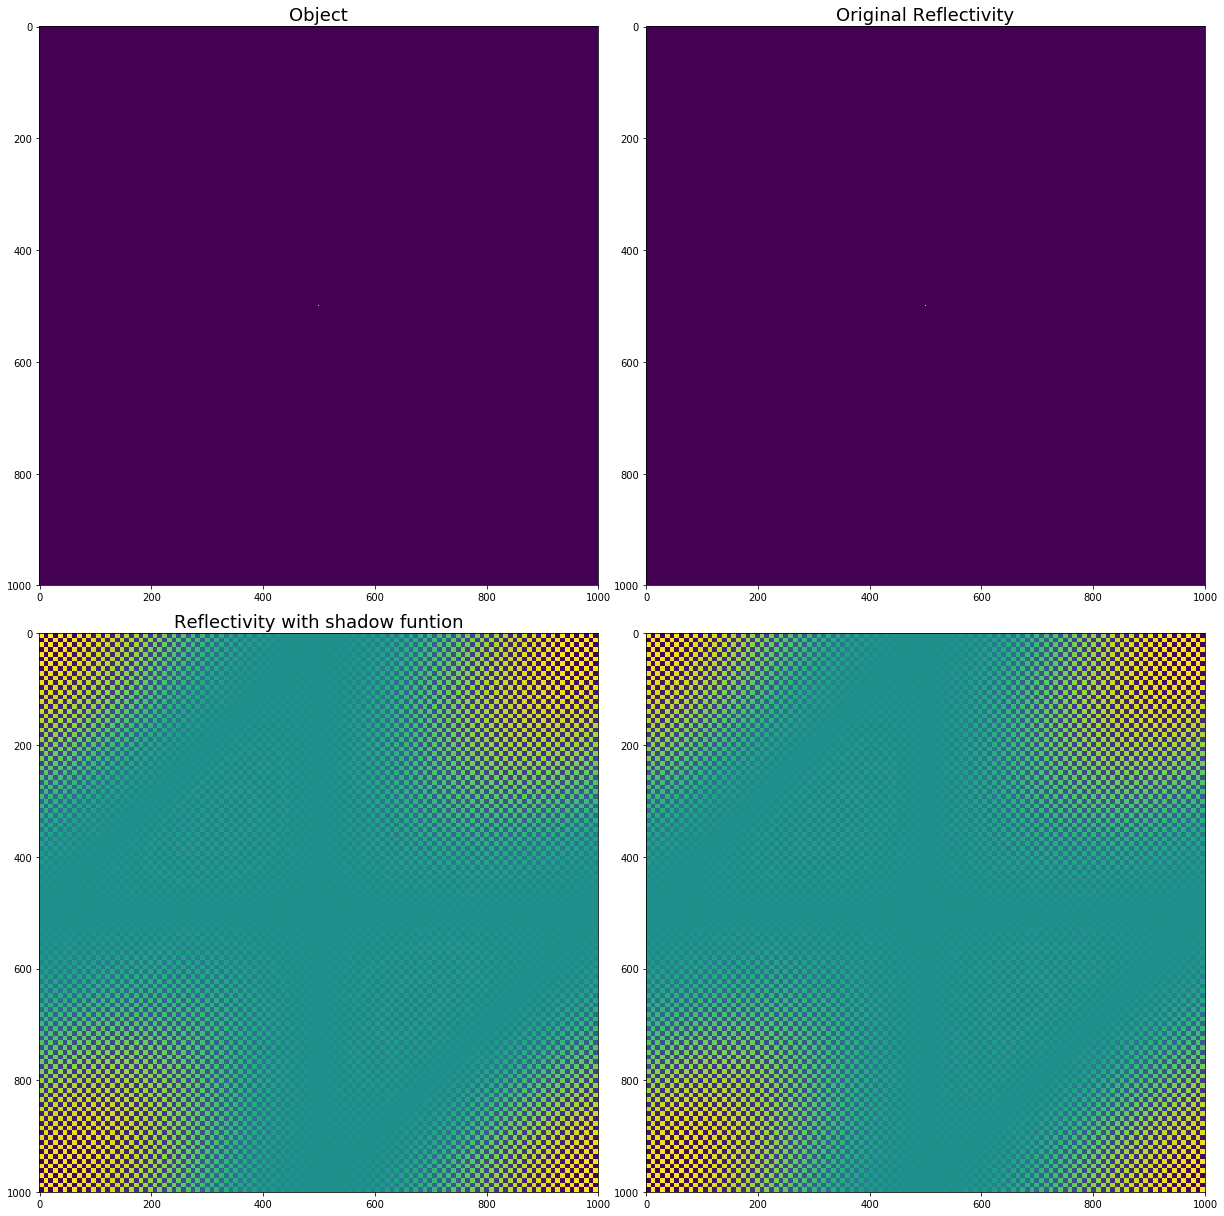

In [59]:
Nrow = 1000# num rows
Ncol = 1000 # num columns

Object = np.zeros((Nrow,Ncol))
Object[int(round(3.495*Nrow/7)):int(round(3.507*Nrow/7)),int(round(3.495*Ncol/7)):int(round(3.507*Ncol/7))] = 1.0

Reflectivity = np.copy(Object)

# x = np.linspace(-np.pi,np.pi,np.size(Object, 1))
# y = np.arange(-np.pi,np.pi,np.size(Object, 0))
# X, Y = np.meshgrid(x,y)
# Sine = np.sin(X*2 + Y*2)



# xr = np.arange(0,Nrow,1)
# xc = np.arange(0,Ncol,1)
# XC,XR = np.meshgrid(xc,xr)
# forward_integrand = np.empty(np.shape(Object), dtype=np.complex)
# IPSII = np.empty(np.shape(Object), dtype=np.complex)

# for i in range(0,Nrow):
#     for n in range(0,Ncol):
#         forward_integrand = Reflectivity*np.exp((-1j)*2*np.pi*(n*XC/Ncol + i*XR/Nrow))
#         IPSII[i,n] = sum(sum(forward_integrand))        

       
    
    
    
    
    
plt.subplots(figsize=(17,17))
plt.subplot(2,2,1)
plt.title('Object', fontsize=18)
plt.imshow(Object)

plt.subplot(2,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(Reflectivity)

plt.subplot(2,2,3)
plt.title('Reflectivity with shadow funtion', fontsize=18)
plt.imshow(np.fft.fft2(Reflectivity).real)

plt.subplot(2,2,4)
plt.imshow(np.fft.ifft2(Reflectivity).real)

plt.tight_layout()
plt.show()

In [30]:
np.zeros?

In [ ]:
def transform_with_shadow():
    Nrow = 50 # num rows
    Ncol = 50 # num columns

    Object = np.zeros((Nrow,Ncol))
    Object[3,6:11] = 1
    Object[7,6:11] = 1
    Object[4:7,6] = 1
    Object[4:7,10] = 1
    Object[6,10] = 1
    Reflectivity = Object

#     x = np.linspace(-np.pi,np.pi,np.size(Object, 1))
#     y = np.arange(-np.pi,np.pi,np.size(Object, 0))
#     X, Y = np.meshgrid(x,y)
#     Sine = np.sin(X*2 + Y*2)


    FFTf = np.fft.fft2(Object)
    IFFTf = np.fft.ifft2(FFTf)


    xr = np.arange(0,Nrow,1)
    xc = np.arange(0,Ncol,1)
    XC,XR = np.meshgrid(xc,xr)
    forward_integrand = np.empty(np.shape(Object), dtype=np.complex)
    IPSII = np.empty(np.shape(Object), dtype=np.complex)

    for i in range(0,Nrow):
        for n in range(0,Ncol):
            forward_integrand = Reflectivity*np.exp((-1j)*2*np.pi*(n*XC/Ncol + i*XR/Nrow))
            IPSII[i,n] = sum(sum(forward_integrand))
            
